In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [5]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

2.0.15


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
import seaborn as sns
%matplotlib inline

In [7]:
db_df10 = pd.read_csv('all_house_senate_2010.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [8]:
db_df12 = pd.read_csv('all_house_senate_2012.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [9]:
db_df14 = pd.read_csv('all_house_senate_2014.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [10]:
db_df16 = pd.read_csv('all_house_senate_2016.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode', encoding='ANSI')

In [8]:
db_df10.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,06,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,064608708,2010-04-01,$254.40,POSTAGE MACHINE LEASE,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25707,NaN
1,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,06,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,193439533,2010-04-01,"$1,650.00",OFFICE RENT,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25700,NaN
2,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,06,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,070541867,2010-09-13,"$3,140.00",ADVERTISING: WEB ADVERTISING,NaN,NaN,004,Advertising Expenses,B-E-27437,NaN
3,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,06,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,150908655,2010-09-13,"$2,305.00",FUNDRAISING: FUNDRAISING COMMISSION,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-27443,NaN
4,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,06,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,152507461,2010-09-13,$44.72,OVERNIGHT MAIL,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-27432,NaN


In [9]:
db_df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872105 entries, 0 to 872104
Data columns (total 26 columns):
com_id         872105 non-null object
com_nam        872105 non-null object
can_id         872105 non-null object
can_nam        872105 non-null object
ele_yea        872105 non-null object
can_off        872105 non-null object
can_off_sta    872105 non-null object
can_off_dis    872105 non-null object
lin_num        872105 non-null object
lin_ima        872105 non-null object
rec_com_id     51233 non-null object
rec_nam        872041 non-null object
rec_str1       865520 non-null object
rec_str2       107127 non-null object
rec_cit        868010 non-null object
rec_sta        868039 non-null object
rec_zip        865383 non-null object
dis_dat        871742 non-null object
dis_amo        872103 non-null object
dis_pur_des    865524 non-null object
mem_cod        172648 non-null object
mem_tex        187545 non-null object
cat_cod        325145 non-null object
cat_des        3

In [11]:
#Converting dis_dat into datetime
#2010
db_df10['dis_dat'] = db_df10['dis_dat'].astype('str')
db_df10['dis_dat'] = db_df10['dis_dat'].apply(lambda x : pd.to_datetime(x , format='%Y-%m-%d', errors='coerce'))
#2012
db_df12['dis_dat'] = db_df12['dis_dat'].astype('str')
db_df12['dis_dat'] = db_df12['dis_dat'].apply(lambda x : pd.to_datetime(x , format='%Y-%m-%d', errors='coerce'))
#2014
db_df14['dis_dat'] = db_df14['dis_dat'].astype('str')
db_df14['dis_dat'] = db_df14['dis_dat'].apply(lambda x : pd.to_datetime(x , format='%Y-%m-%d', errors='coerce'))
#2016
db_df16['dis_dat'] = db_df16['dis_dat'].astype('str')
db_df16['dis_dat'] = db_df16['dis_dat'].apply(lambda x : pd.to_datetime(x , format='%Y-%m-%d', errors='coerce'))

In [12]:
#Converting dis_amount into a float
#2010
db_df10['dis_amo'] = db_df10['dis_amo'].astype('str')
db_df10['dis_amo'] = db_df10['dis_amo'].apply(lambda x:x.replace("$","").replace(",","")).astype('float')
#2012
db_df12['dis_amo'] = db_df12['dis_amo'].astype('str')
db_df12['dis_amo'] = db_df12['dis_amo'].apply(lambda x:x.replace("$","").replace(",","")).astype('float')
#2014
db_df14['dis_amo'] = db_df14['dis_amo'].astype('str')
db_df14['dis_amo'] = db_df14['dis_amo'].apply(lambda x:x.replace("$","").replace(",","")).astype('float')
#2016
db_df16['dis_amo'] = db_df16['dis_amo'].astype('str')
db_df16['dis_amo'] = db_df16['dis_amo'].apply(lambda x:x.replace("$","").replace(",","")).astype('float')

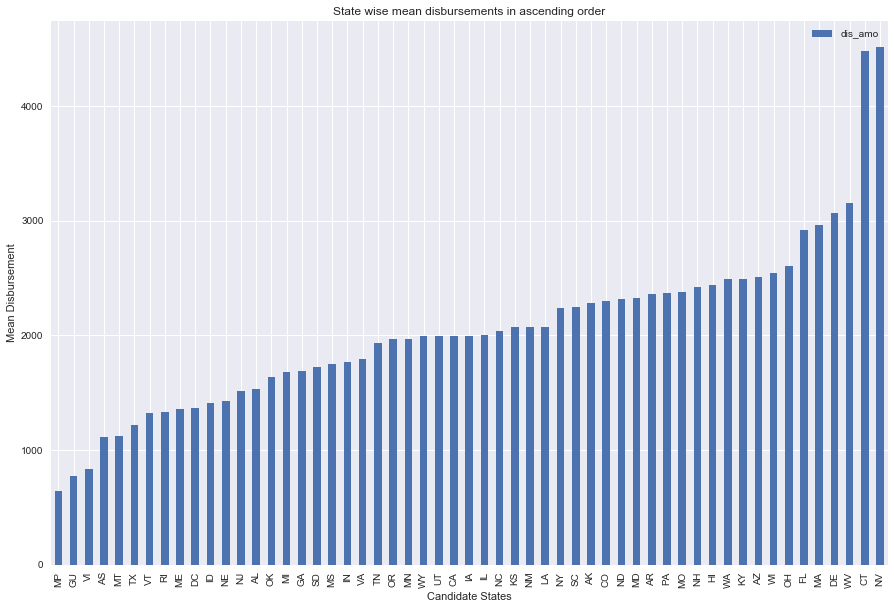

In [74]:
#Bar plot of state wise mean disbursements in ascending order
db_df10_bp1 = db_df10.groupby('can_off_sta')[['can_off_sta','dis_amo']].mean().sort_values('dis_amo').plot(kind='bar',figsize=(15,10))
db_df10_bp1.set_xlabel('Candidate States')
db_df10_bp1.set_ylabel('Mean Disbursement')
db_df10_bp1.set_title('State wise mean disbursements in ascending order')

In [245]:
#function returning a groupby state and office object
def GSO(State, Office):
    return db_df10[(db_df10['can_off_sta']==State) & (db_df10['can_off'] == Office)].groupby('can_off_sta')[['dis_dat','dis_amo']]

NV    Axes(0.1,0.15;0.8x0.75)
dtype: object

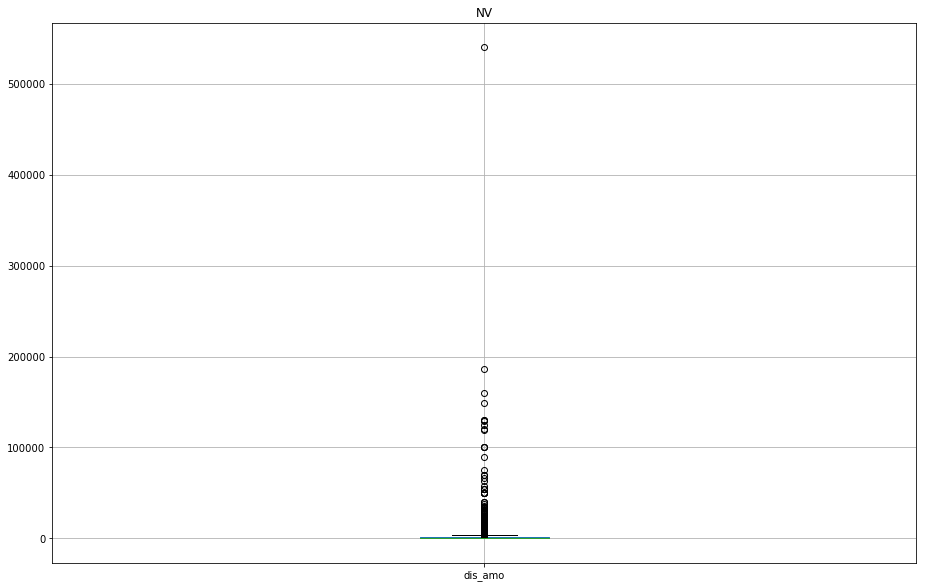

In [246]:
#Box plot is useless because of uneven distribution with high std
GSO('NV','H').boxplot(figsize=(15,10),showbox=True)

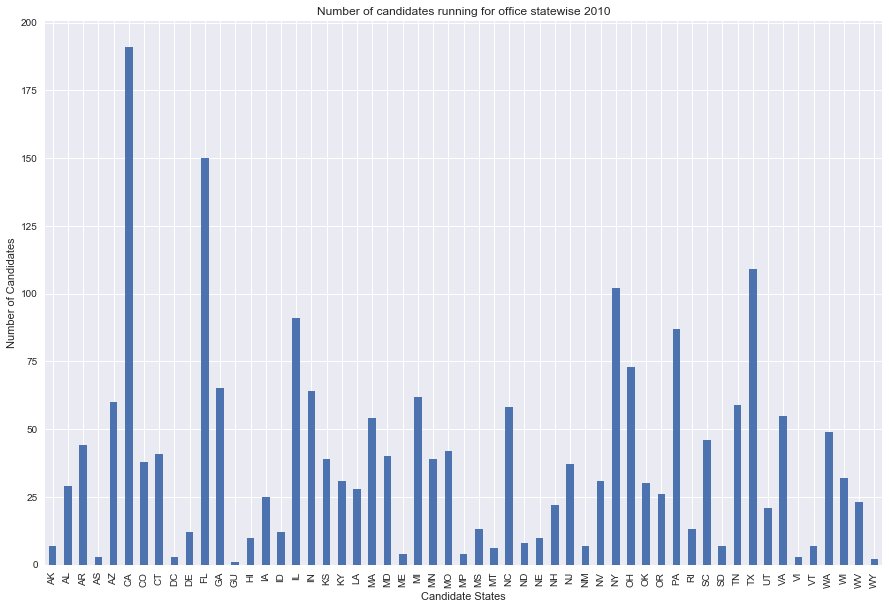

In [72]:
# Number of candidates running for office statewise 2010
db_df10_bp2 = db_df10.drop_duplicates('can_id').groupby('can_off_sta')['can_id'].count().plot(kind='bar',figsize=(15,10))
db_df10_bp2.set_xlabel('Candidate States')
db_df10_bp2.set_ylabel('Number of Candidates')
db_df10_bp2.set_title('Number of candidates running for office statewise 2010')

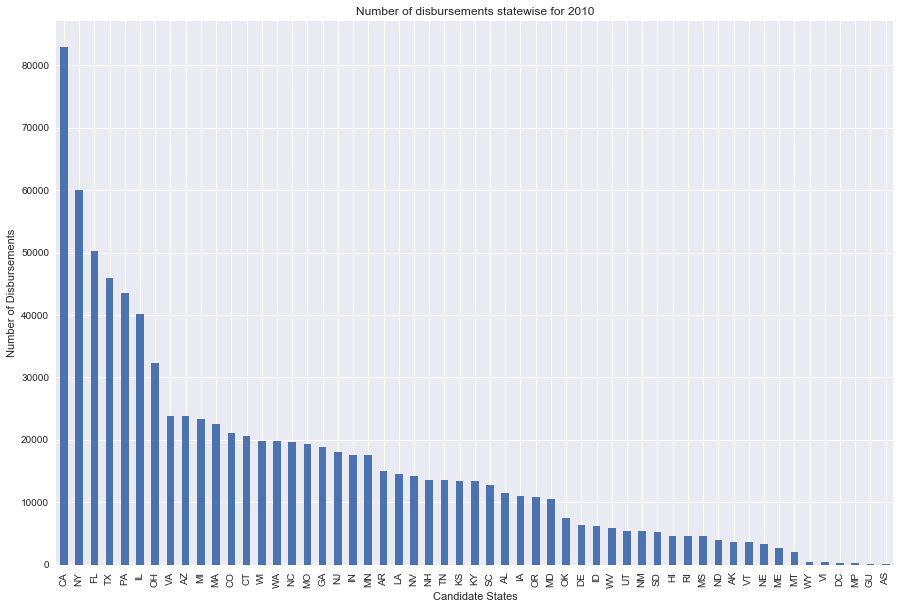

In [71]:
# Number of disbursements statewise for 2010
db_df10_bp3 = db_df10['can_off_sta'].value_counts().plot(kind='bar',figsize=(15,10))
db_df10_bp3.set_xlabel('Candidate States')
db_df10_bp3.set_ylabel('Number of Disbursements')
db_df10_bp3.set_title('Number of disbursements statewise for 2010')

In [21]:
#Counting the number of candidates by state
db_df10p = db_df10.drop_duplicates('can_id').groupby('can_off_sta')['can_id'].count().to_frame()

In [22]:
db_df10p = db_df10p.join(db_df10.groupby('can_off_sta')[['can_off_sta','dis_amo']].std())

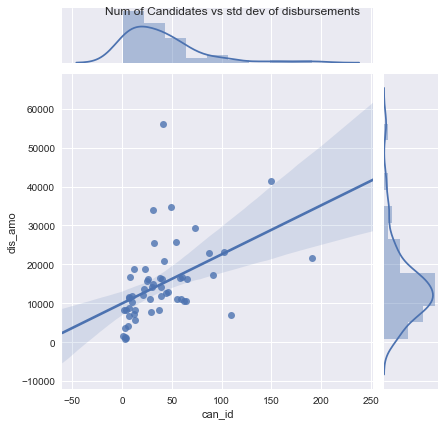

In [30]:
#Comparing the relation between the number of candidates and the standard deviation of the disbursements for every state
#using joint grid
g = sns.JointGrid(x="can_id", y="dis_amo", data=db_df10p)
g1 = g.plot(sns.regplot, sns.distplot)
g1.fig.suptitle('Num of Candidates vs std dev of disbursements')
#g1.set(xlabel='Number of Candidates', ylabel='Std Dev of Disbursements')

In [31]:
db_df10p1 = db_df10.drop_duplicates('can_id').groupby('can_off_sta')['can_id'].count().to_frame()
db_df10p1 = db_df10p1.join(db_df10.groupby('can_off_sta')[['can_off_sta','dis_amo']].median())

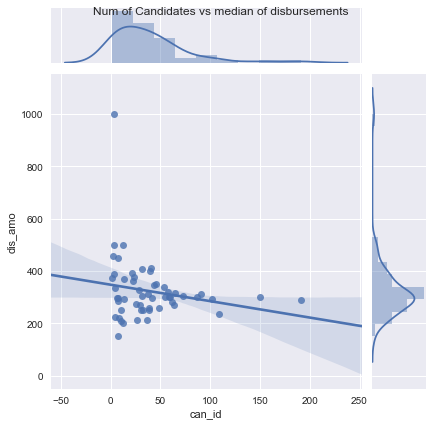

In [32]:
#Comparing the relation between the number of candidates and the median of the disbursements for every state
#using joint grid
g = sns.JointGrid(x="can_id", y="dis_amo", data=db_df10p1)
g2 = g.plot(sns.regplot, sns.distplot)
g2.fig.suptitle('Num of Candidates vs median of disbursements')

In [248]:
db_df10['rec_sta'].count()

868039

In [249]:
db_df10['dis_dat'].dt.year.unique()

array([ 2010.,  2009.,  2008.,  2007.,  2004.,    nan,  1998.,  2020.,
        2006.,  2003.,  2005.,  2001.,  2019.,  2011.,  1930.,  2000.,
        1985.,  2091.,  1999.,  1995.,  1916.,  1982.,  2012.,  1992.])

In [38]:
#Grouping by disbursement months for 2010 and calculating mean, median, std etc. to plot the time series 
db_df10m = db_df10[db_df10['dis_dat'].dt.year ==2010].groupby(db_df10['dis_dat'].dt.month)['dis_amo'].agg({'Disbursement amount':['median','mean','count','std']})

C:\Users\NKomara\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



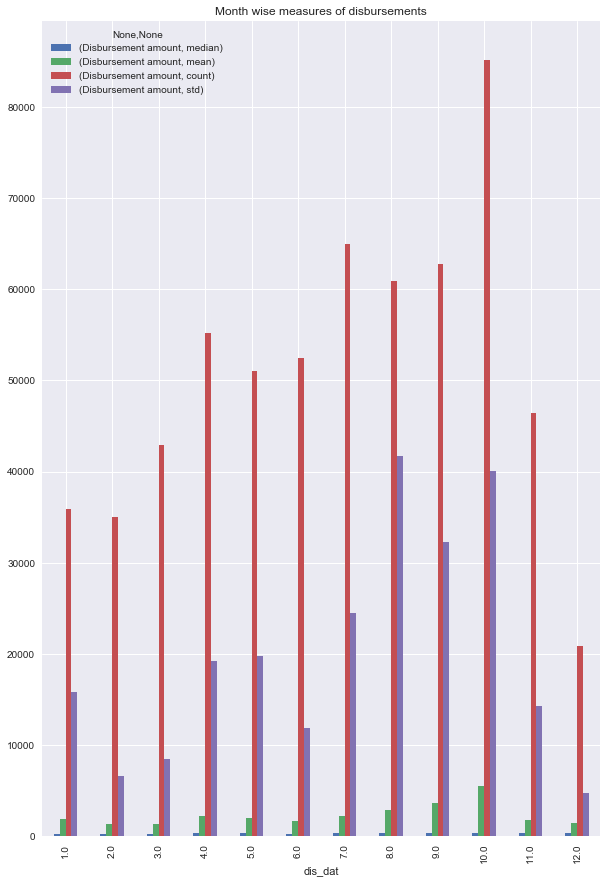

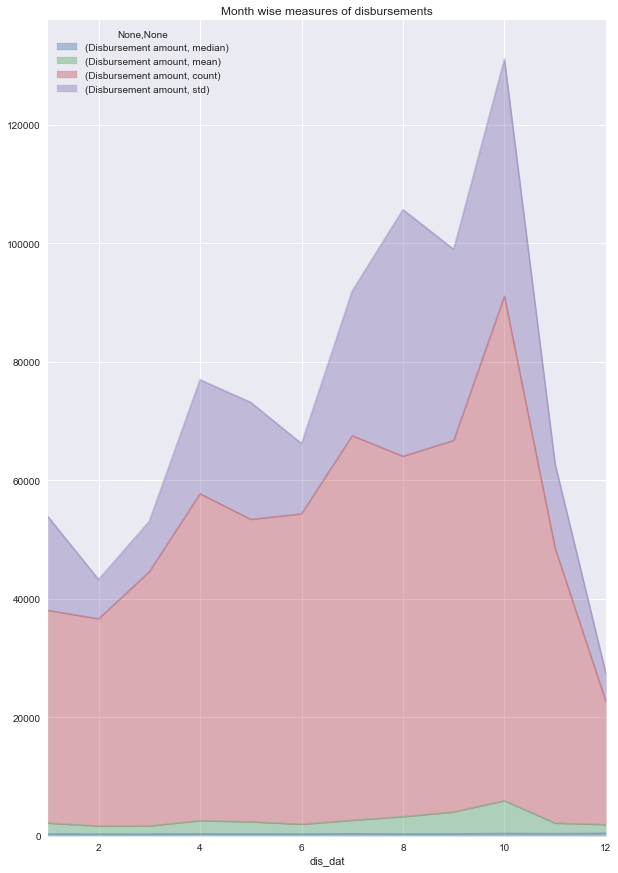

In [39]:
db_df10m.plot.bar(figsize=(10,15), title='Month wise measures of disbursements')
db_df10m.plot.area(alpha=0.4,figsize=(10,15), title='Month wise measures of disbursements')

In [40]:
#Grouping by disbursement months for all non-2010 and calculating mean, median, std etc. to plot the time series monthwise
db_df10mb = db_df10[db_df10['dis_dat'].dt.year !=2010].groupby(db_df10['dis_dat'].dt.month)['dis_amo'].agg({'dis_amo':['median','mean','count','std']})

C:\Users\NKomara\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



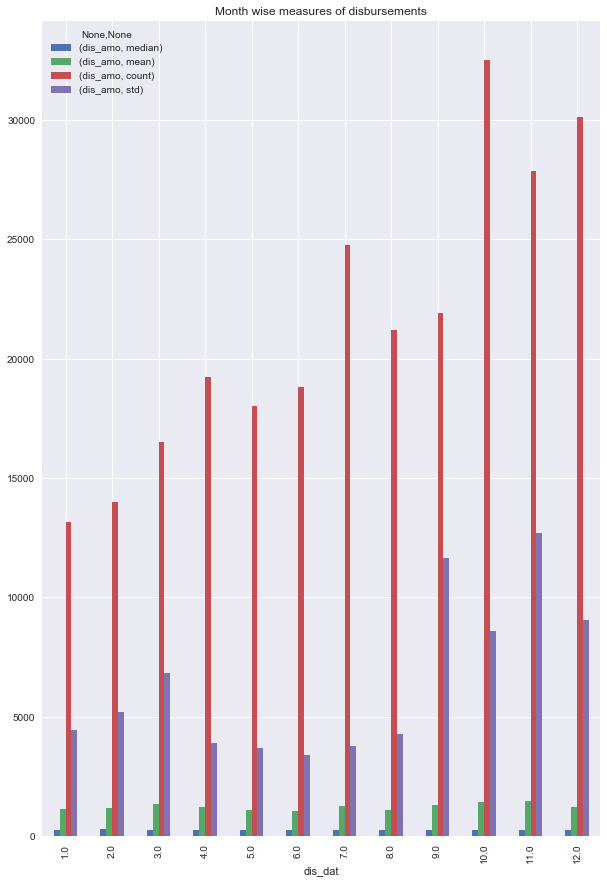

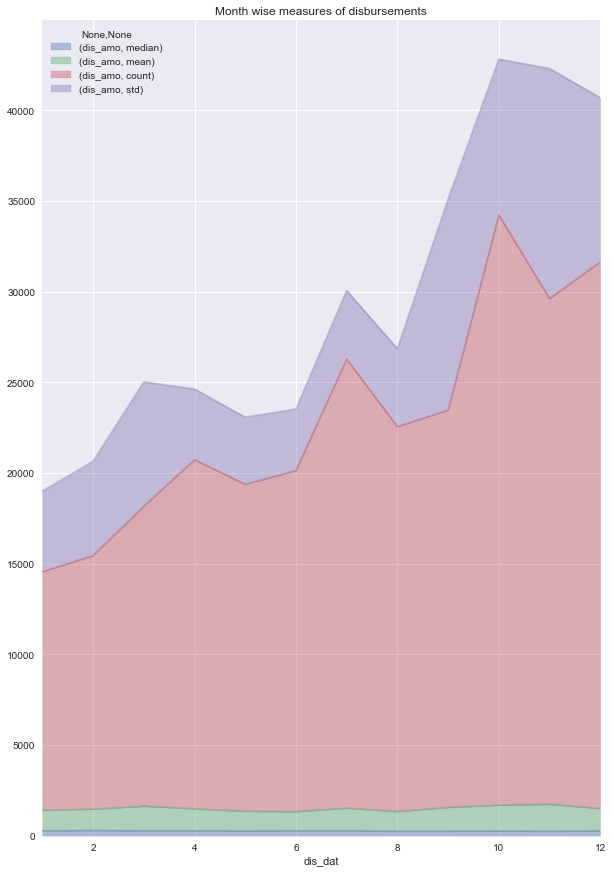

In [41]:
db_df10mb.plot.bar(figsize=(10,15), title='Month wise measures of disbursements')
db_df10mb.plot.area(alpha=0.4,figsize=(10,15), title='Month wise measures of disbursements')

In [251]:
db_df10.groupby(db_df10['dis_dat'].dt.year)['dis_amo'].sum().sort_values()

dis_dat
1999.0    1.710000e+01
1995.0    2.400000e+01
2091.0    5.429000e+01
2020.0    8.513000e+01
1985.0    8.532000e+01
1992.0    8.949000e+01
2019.0    1.000000e+02
1998.0    3.615000e+02
1916.0    5.000000e+02
2012.0    5.790000e+02
1930.0    6.692800e+02
1982.0    8.000000e+02
2003.0    8.821800e+02
2001.0    1.353580e+03
2000.0    2.449000e+03
2007.0    2.923990e+03
2006.0    3.060330e+03
2011.0    4.326170e+03
2005.0    5.226000e+03
2004.0    2.640342e+04
2008.0    5.561308e+05
2009.0    3.232069e+08
2010.0    1.620286e+09
Name: dis_amo, dtype: float64

In [46]:
df1 = db_df10.groupby('can_off_sta')[['can_off_sta','dis_amo']].sum()

In [47]:
df1['can_off_sta']=df1.index

In [256]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df1['can_off_sta'],
            z = df1['dis_amo'],
            locationmode = 'USA-states',
            text = df1['dis_amo'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

In [257]:
layout = dict(title = '2010 US Congressional Election Disbursements',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [258]:
choromap = go.Figure(data = [data],layout = layout)

In [259]:
iplot(choromap)

In [306]:
db_df10['cat_des'].nunique()

12

In [307]:
db_df10['cat_des'].value_counts().head(12)

Administrative/Salary/Overhead Expenses     184578
Solicitation and Fundraising Expenses        38218
Travel Expenses                              32501
Advertising Expenses                         23241
Campaign Event Expenses                       9954
Campaign Materials                            9594
Refunds of Contributions                      6985
Political Contributions                       6326
Donations                                     3148
Polling Expenses                              1385
Loan Repayments                                801
Transfers                                      245
Name: cat_des, dtype: int64

In [324]:
db_df16[db_df16['can_off'] == 'P']['can_off_sta'].unique()

array(['US'], dtype=object)

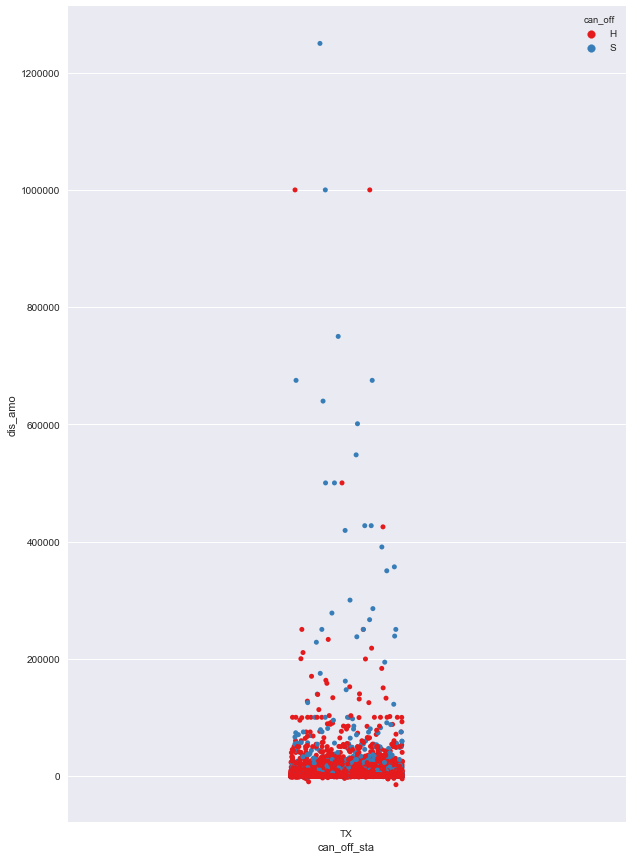

In [335]:
#Comparing the 2010 disbursements for house and senate in TX
plt.rcParams['figure.figsize']=(10,15)
sns.stripplot(x="can_off_sta", y="dis_amo", data=db_df14[db_df14['can_off_sta'] == 'TX'],jitter=True,hue ="can_off",palette='Set1' )

In [44]:
#Cutting the disbursements into chunks to get a look at the contributions from each level
bins = [0,999.999,9999.999,49999.999,99999.999,999999.999,99999999999999]
group_names = ["1. 0-1k","2. 1k-10k","3. 10k-50k","4. 50k-100k","5. 100k-1M","6. >1M"]
db_df10['dis_amo_bra'] = pd.cut(db_df10['dis_amo'], bins, labels=group_names)

In [388]:
db_df10['dis_amo_bra'].head()

0      1. 0-1k
1    2. 1k-10k
2    2. 1k-10k
3    2. 1k-10k
4      1. 0-1k
Name: dis_amo_bra, dtype: category
Categories (6, object): [1. 0-1k < 2. 1k-10k < 3. 10k-50k < 4. 50k-100k < 5. 100k-1M < 6. >1M]

In [56]:
#Pivoting the dataframe to look at statewise contributions to disbursements from each level on a heatmap
pv_db_df10 = db_df10.pivot_table(values='dis_amo',index='can_off_sta',columns='dis_amo_bra',aggfunc=np.sum)

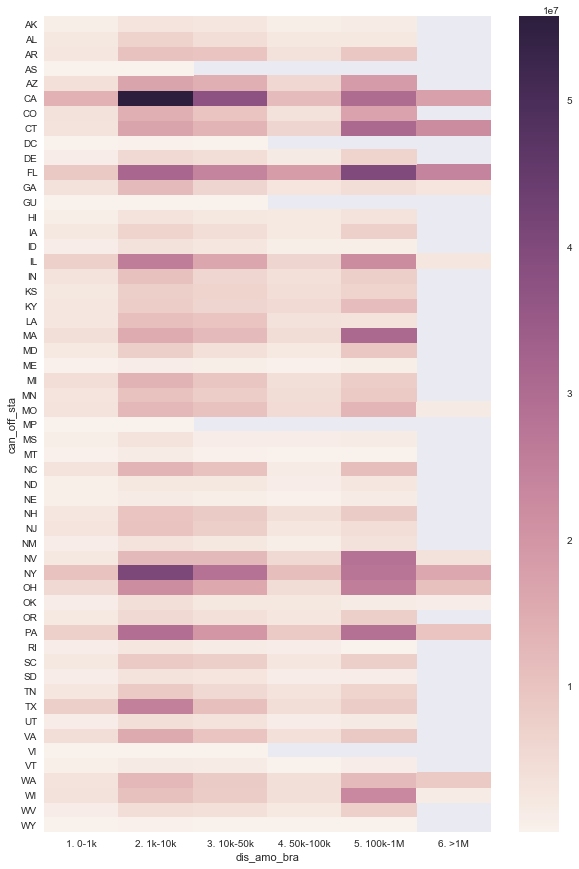

In [390]:
plt.rcParams['figure.figsize']=(10,15)
sns.heatmap(pv_db_df10)

In [57]:
#Pivoting the dataframe to look at statewise contributions to disbursements from each category level on a heatmap
pv2_db_df10 = db_df10.pivot_table(values='dis_amo',index='can_off_sta',columns='cat_des',aggfunc=np.sum)

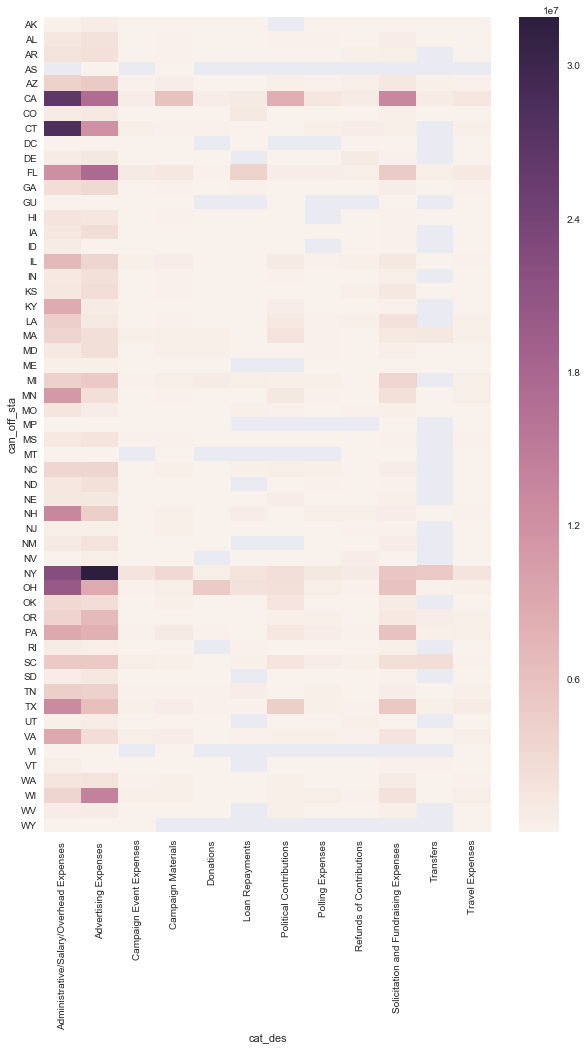

In [392]:
sns.heatmap(pv2_db_df10)

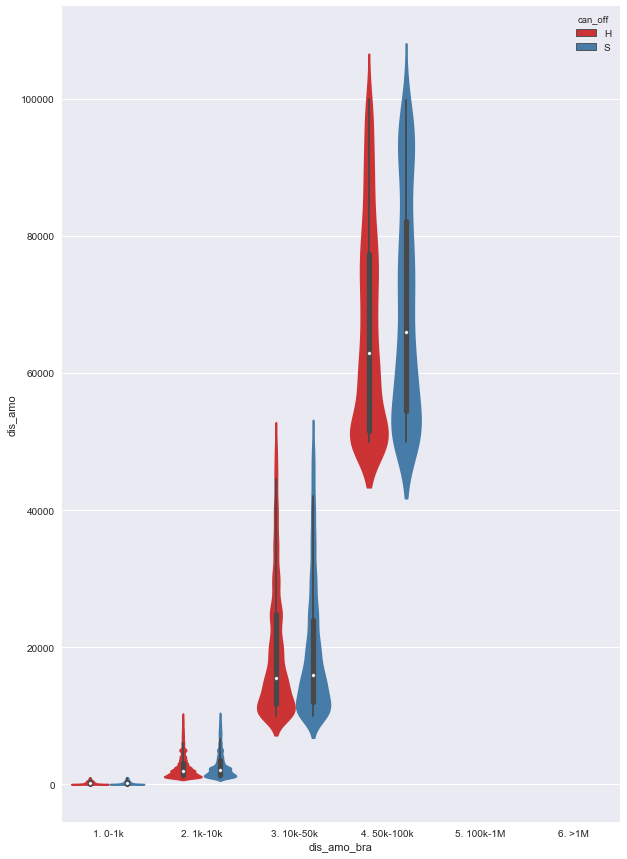

In [46]:
#Excluding larger disbursements to observe the distribution of the lower disbursements
plt.rcParams['figure.figsize']=(10,15)
db_df10_vp1 = sns.violinplot(x="dis_amo_bra", y="dis_amo", data=db_df10[(db_df10['dis_amo_bra'] != "5. 100k-1M") & (db_df10['dis_amo_bra'] != "6. >1M")],hue ="can_off",palette='Set1')
#db_df10_vp1 = db_df10_vp1.set_axis_labels('Disbursement Brackets','Total Disbursements')

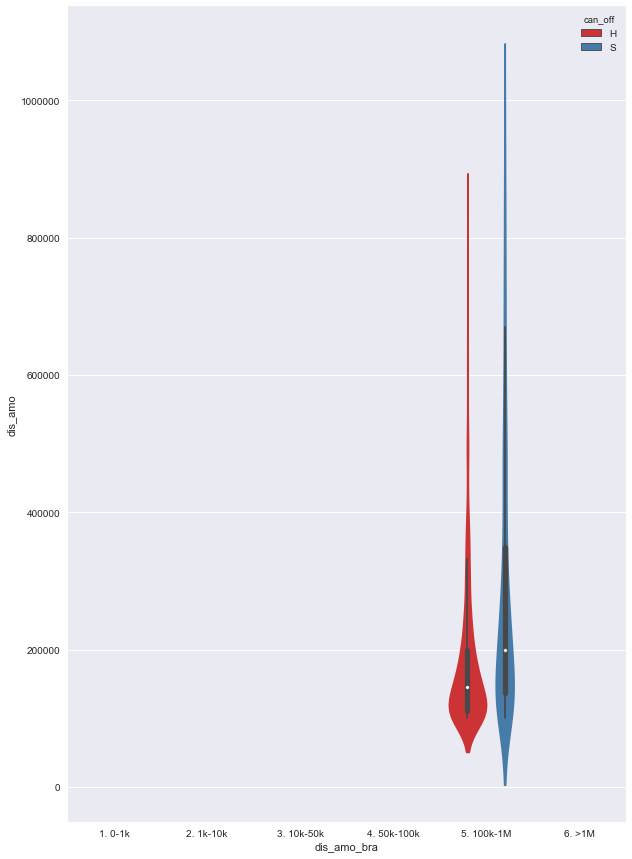

In [399]:
#Including slightly larger disbursements to observe their distribution
plt.rcParams['figure.figsize']=(10,15)
sns.violinplot(x="dis_amo_bra", y="dis_amo", data=db_df10[(db_df10['dis_amo_bra'] == "5. 100k-1M")],hue ="can_off",palette='Set1')

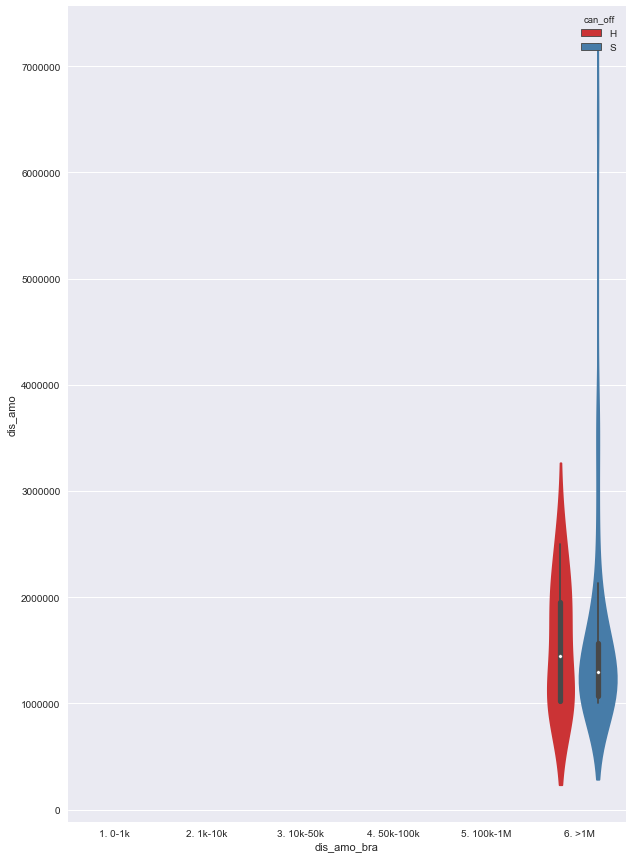

In [400]:
#Including largest disbursements to observe their distribution
plt.rcParams['figure.figsize']=(10,15)
sns.violinplot(x="dis_amo_bra", y="dis_amo", data=db_df10[(db_df10['dis_amo_bra'] == "6. >1M")],hue ="can_off",palette='Set1')

In [50]:
#Concatenating the 4 dataframes into a big dataframe with all election years
db_df = pd.concat([db_df10,db_df12,db_df14,db_df16])

In [51]:
#Adding Year and Month fields
db_df['dis_yea'] = db_df['dis_dat'].dt.year
db_df['dis_mon'] = db_df['dis_dat'].dt.month

In [47]:
#Pivoting to get statewise disbursements for H & S
pv3_db_df10 = db_df10.pivot_table(values='dis_amo',index='can_off_sta',columns='can_off',aggfunc=np.sum)

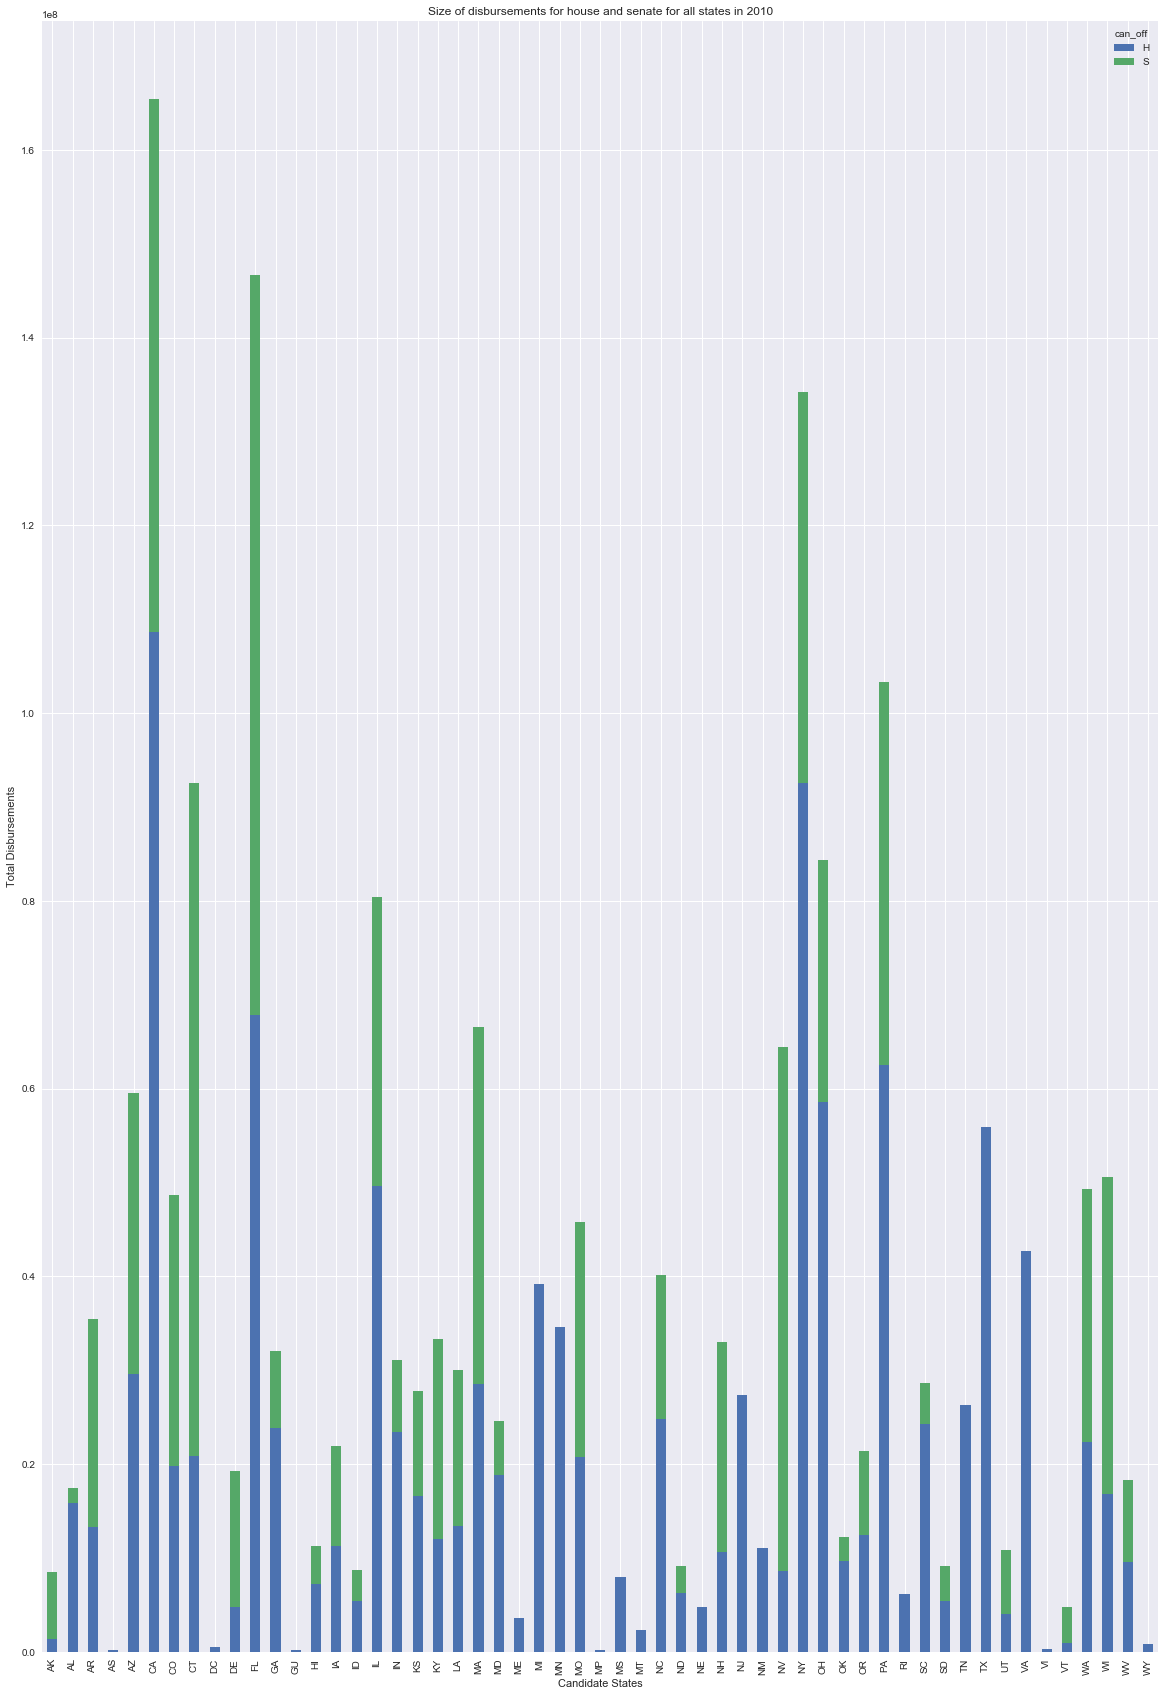

In [70]:
#Stacked barplot to see the size of disbursements for house and senate for all states in 2010
f5 = pv3_db_df10.plot.bar(stacked=True,figsize=(20,30))
f5.set_xlabel('Candidate States')
f5.set_ylabel('Total Disbursements')
f5.set_title('Size of disbursements for house and senate for all states in 2010')

In [53]:
#filtering dataframes for timeseries analysis for each candidate office over the 4 election years for:
#House and the disbursements made during the election year
pv_db_df_h = db_df[(db_df['can_off'] == 'H') & (db_df['dis_yea'] == db_df['ele_yea'].astype('float'))]
#Senate and the disbursements made during the election year
pv_db_df_s = db_df[(db_df['can_off'] == 'S') & (db_df['dis_yea'] == db_df['ele_yea'].astype('float'))]
#President and the disbursements made during the election year
pv_db_df_p = db_df[(db_df['can_off'] == 'P') & (db_df['dis_yea'] == db_df['ele_yea'].astype('float'))]

In [54]:
#Creating pivoted dataframes for timeseries analysis for each candidate office over the 4 election years for:
#House
ppv_db_df_h = pv_db_df_h.pivot_table(values='dis_amo',index='dis_mon' ,columns=['can_off','dis_yea'], aggfunc=np.sum)
#Senate
ppv_db_df_s = pv_db_df_s.pivot_table(values='dis_amo',index='dis_mon' ,columns=['can_off','dis_yea'], aggfunc=np.sum)
#President
ppv_db_df_p = pv_db_df_p.pivot_table(values='dis_amo',index='dis_mon' ,columns=['can_off','dis_yea'], aggfunc=np.sum)

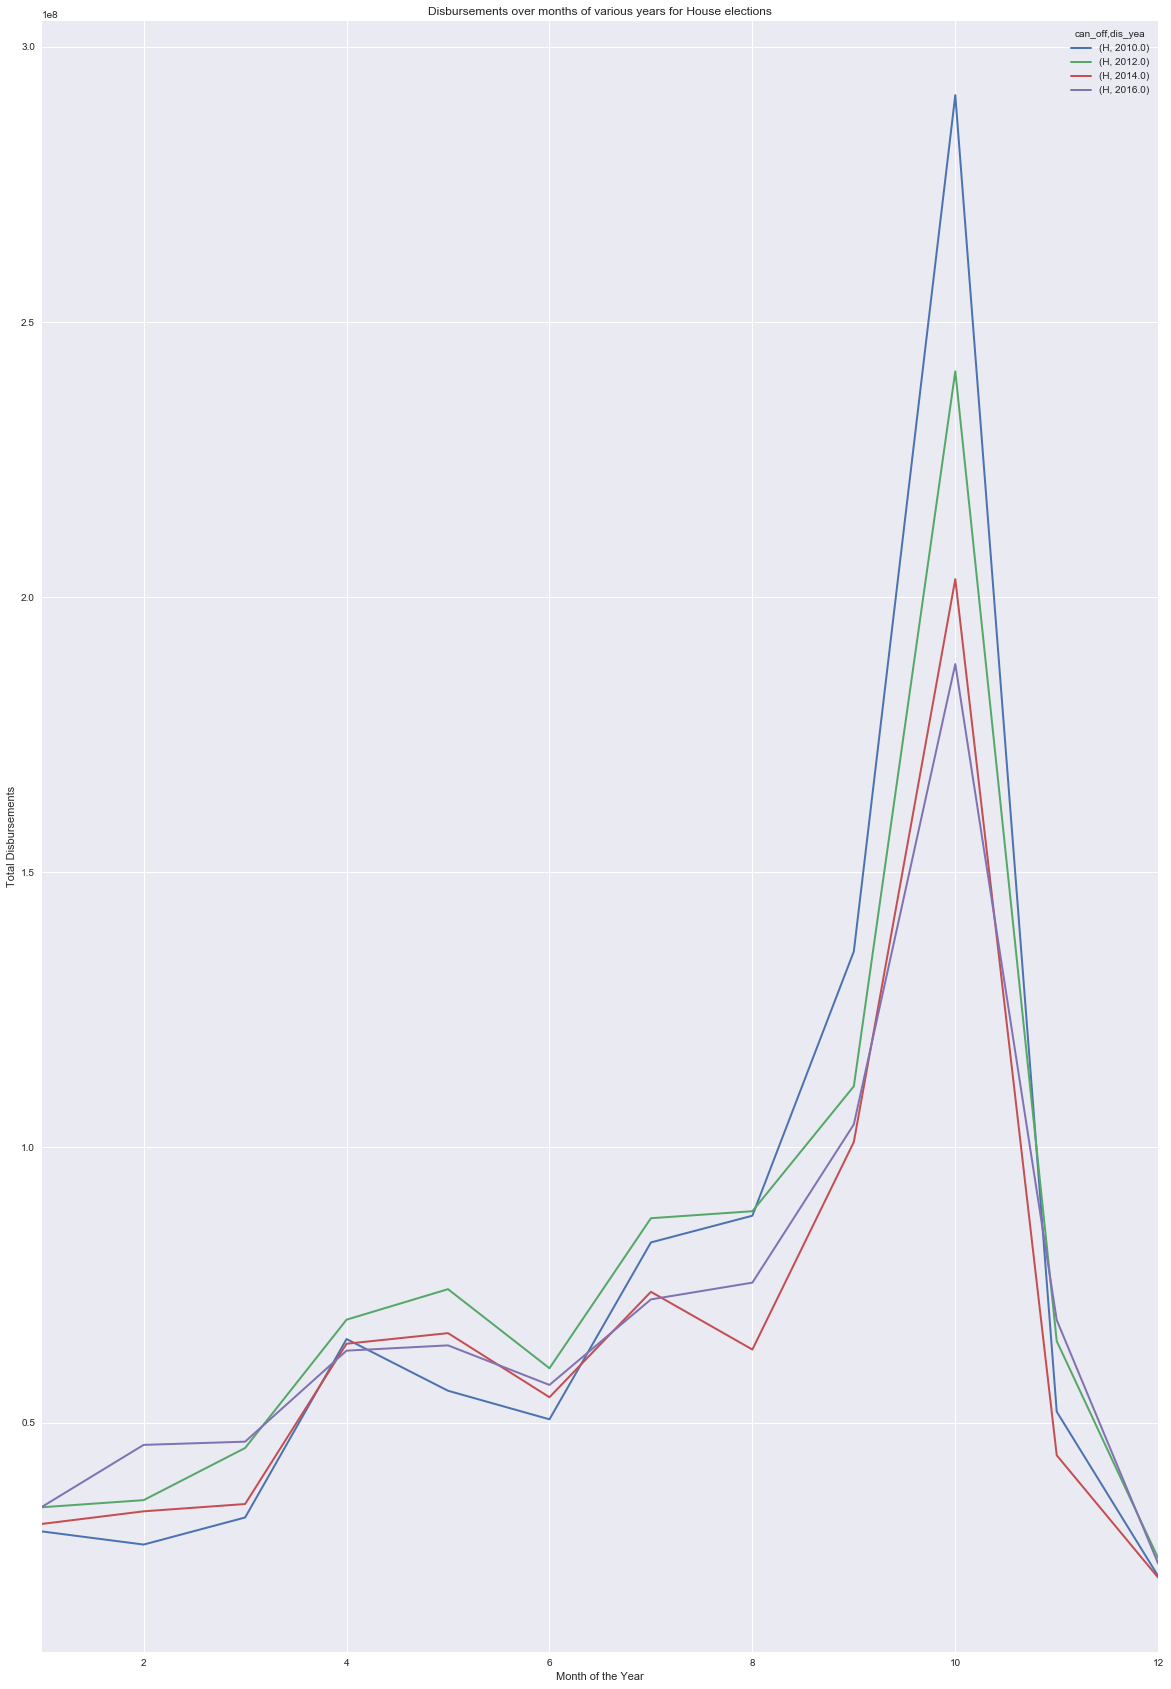

In [69]:
#Time series over months of various election years for House elections
f6 = ppv_db_df_h.plot.line(x = ppv_db_df_h.index, y = ppv_db_df_h.columns, figsize=(20,30),lw=2)
f6.set_xlabel('Month of the Year')
f6.set_ylabel('Total Disbursements')
f6.set_title('Disbursements over months of various years for House elections')

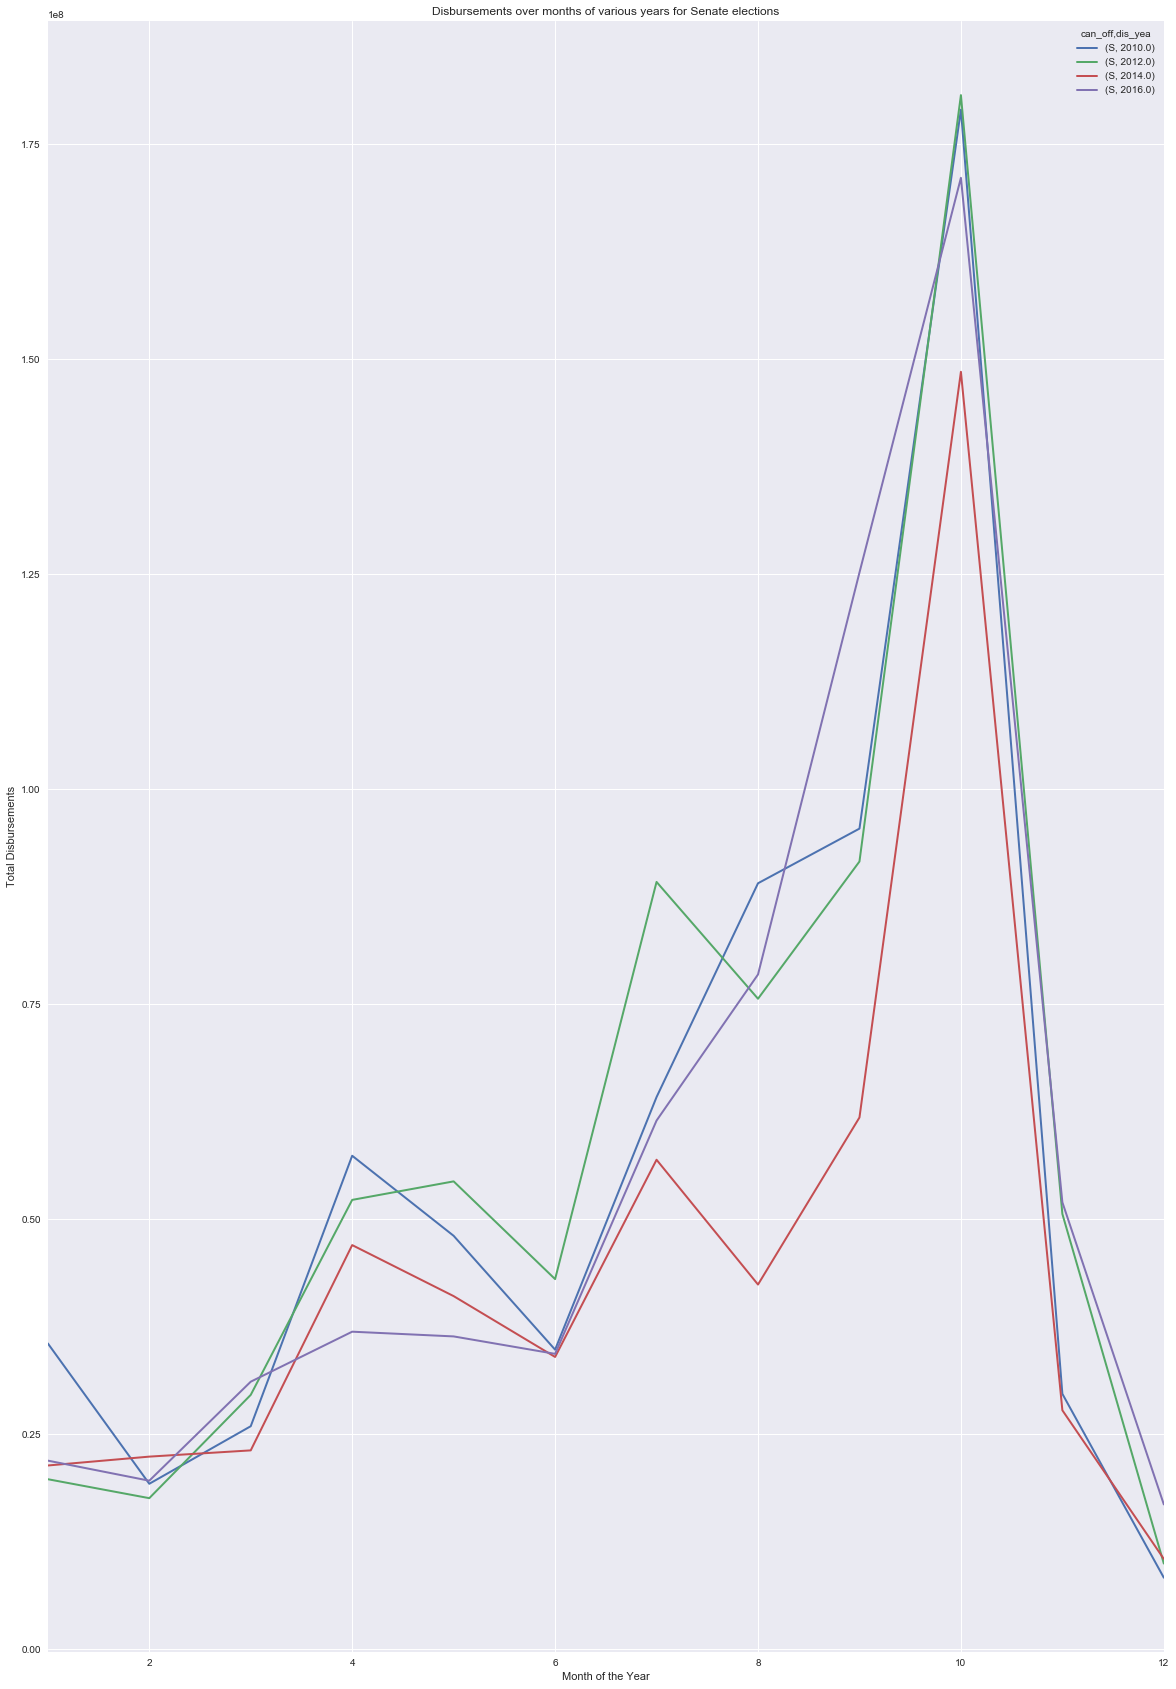

In [68]:
##Time series over months of various election years for Senate elections
f7 = ppv_db_df_s.plot.line(x = ppv_db_df_s.index, y = ppv_db_df_s.columns, figsize=(20,30),lw=2)
f7.set_xlabel('Month of the Year')
f7.set_ylabel('Total Disbursements')
f7.set_title('Disbursements over months of various years for Senate elections')

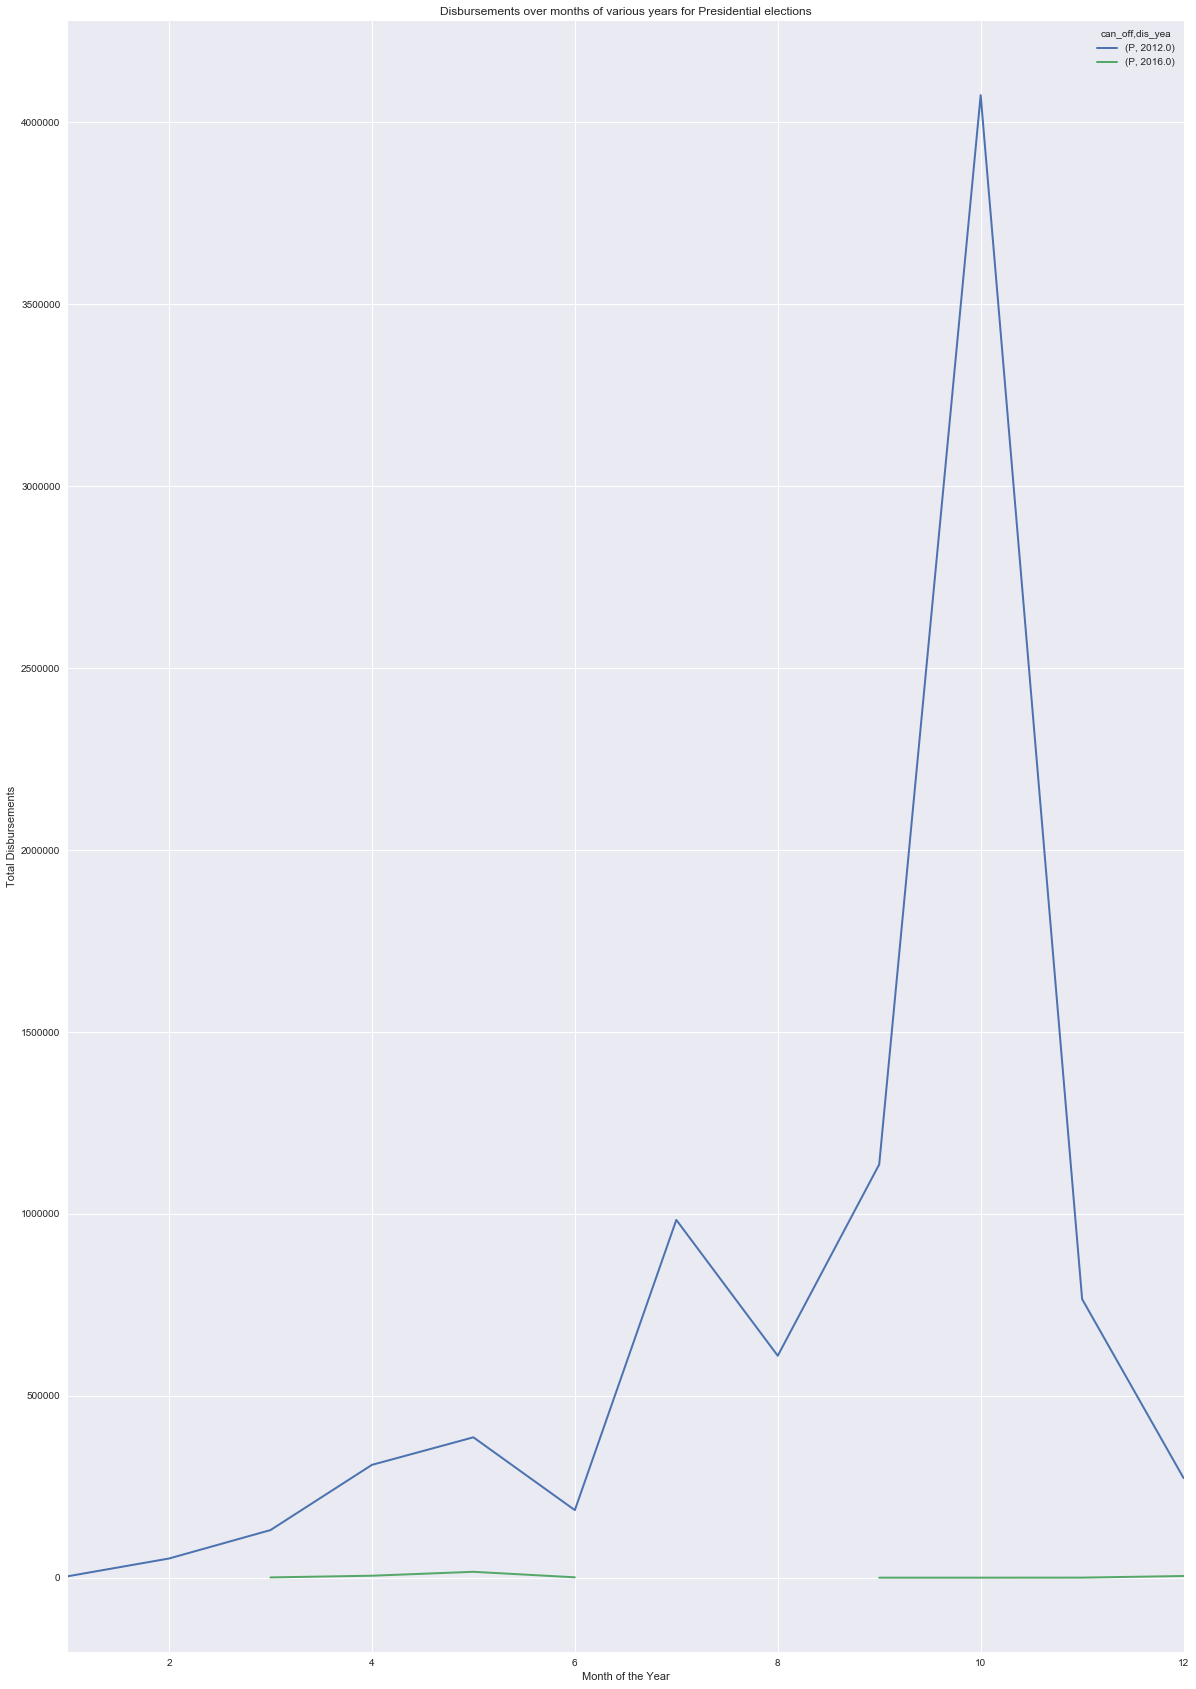

In [67]:
##Time series over months of various election years for Presidential elections
f8 = ppv_db_df_p.plot.line(x = ppv_db_df_p.index, y = ppv_db_df_p.columns, figsize=(20,30),lw=2)
f8.set_xlabel('Month of the Year')
f8.set_ylabel('Total Disbursements')
f8.set_title('Disbursements over months of various years for Presidential elections')

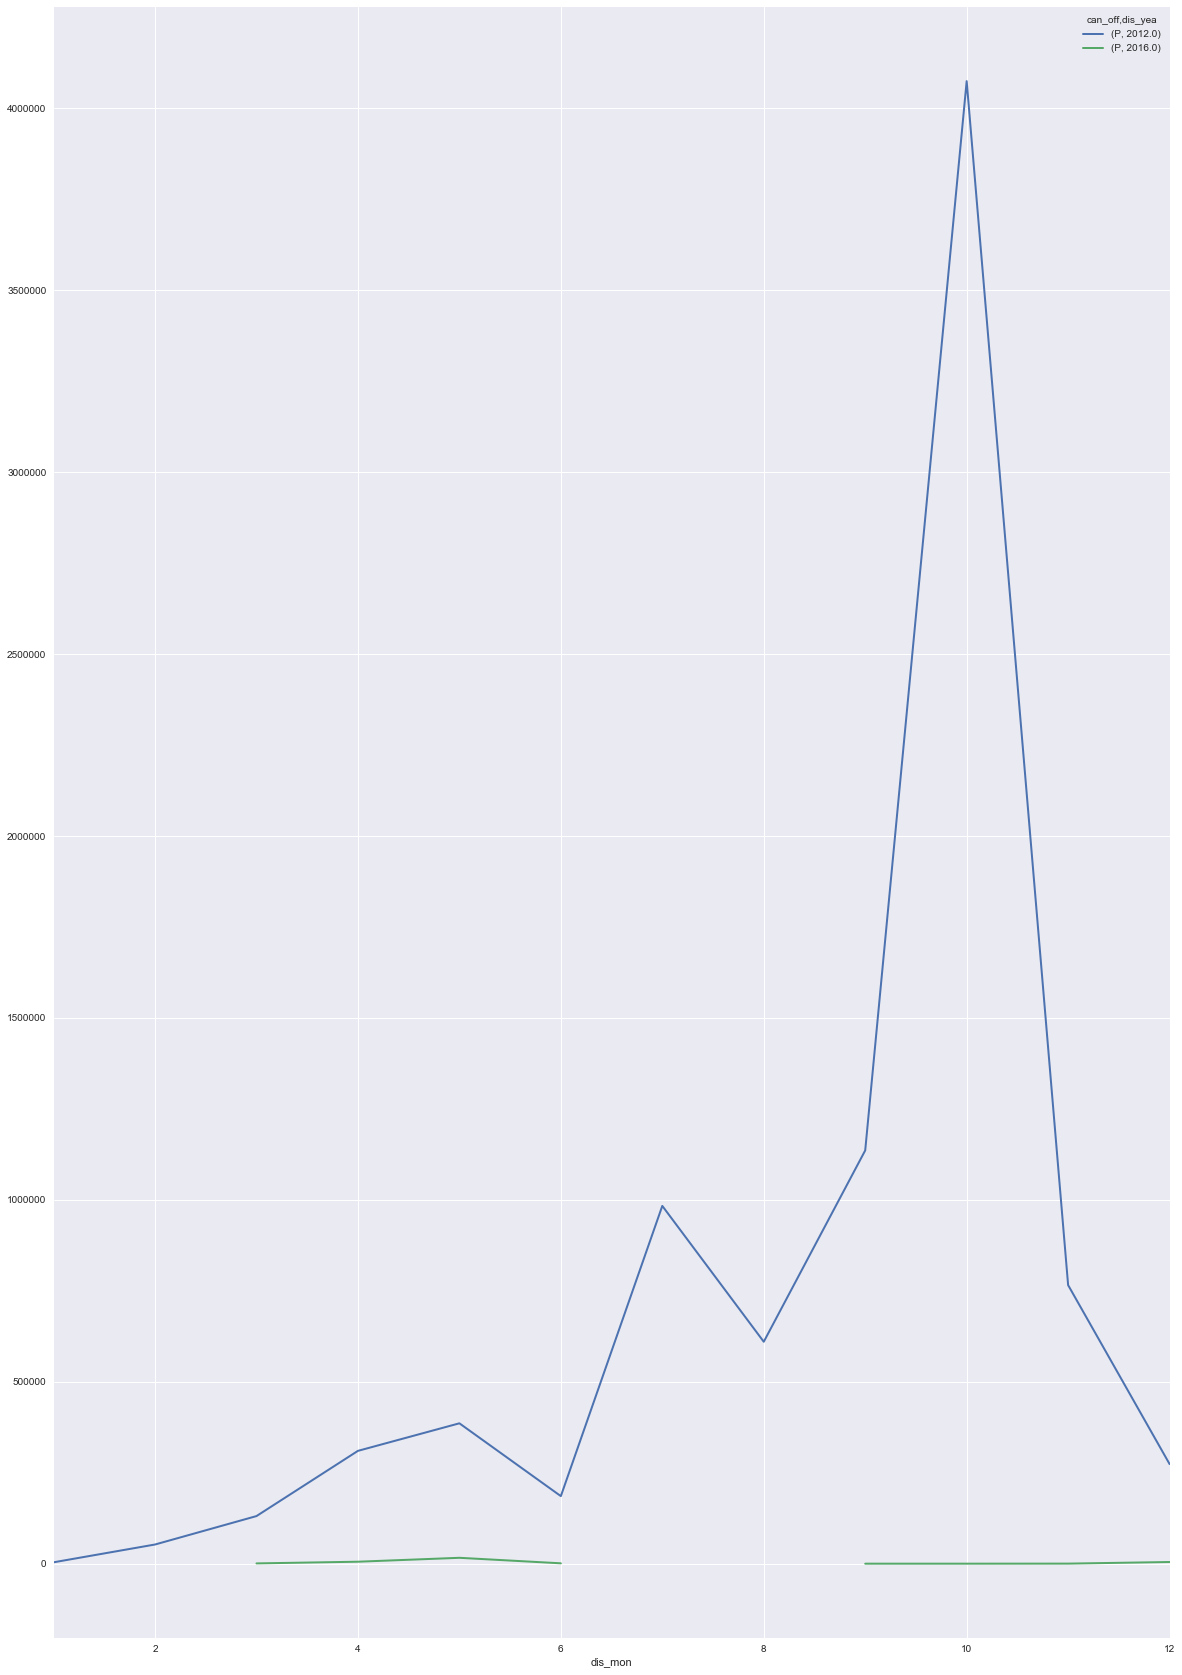

In [560]:
#Looking if something's wrong with 2016 presidential election disbursements
#Removing the filter for disbursements made during the election year for P
pv_db_df_p1 = db_df[(db_df['can_off'] == 'P')]
ppv_db_df_p1 = pv_db_df_p.pivot_table(values='dis_amo',index='dis_mon' ,columns=['can_off','dis_yea'], aggfunc=np.sum)
ppv_db_df_p1.plot.line(x = ppv_db_df_p.index, y = ppv_db_df_p.columns, figsize=(20,30),lw=2)

In [ ]:
#Looks like something's wrong with 2016 presidential election disbursements. Data is missing

In [75]:
#Presidential candidates have very less states in the data that have significant disbursements
(db_df12[(db_df12['can_off'] == 'P')].groupby('rec_sta')['dis_amo'].sum() > 100000).sum()

10

In [76]:
#A list of all the Candidate office states
fil_sta = db_df['can_off_sta'].unique()

In [77]:
#Filtering the disbursement states on the list of the Candidate office states
db_df_crs = db_df[db_df['rec_sta'].isin(fil_sta)]

In [604]:
#Pivoting the dataframe to plot what share of a candidates disbursements go to different recipient states
pv_db_df_b = db_df_crs.pivot_table(values='dis_amo',index='can_off_sta',columns='rec_sta',aggfunc=np.sum)

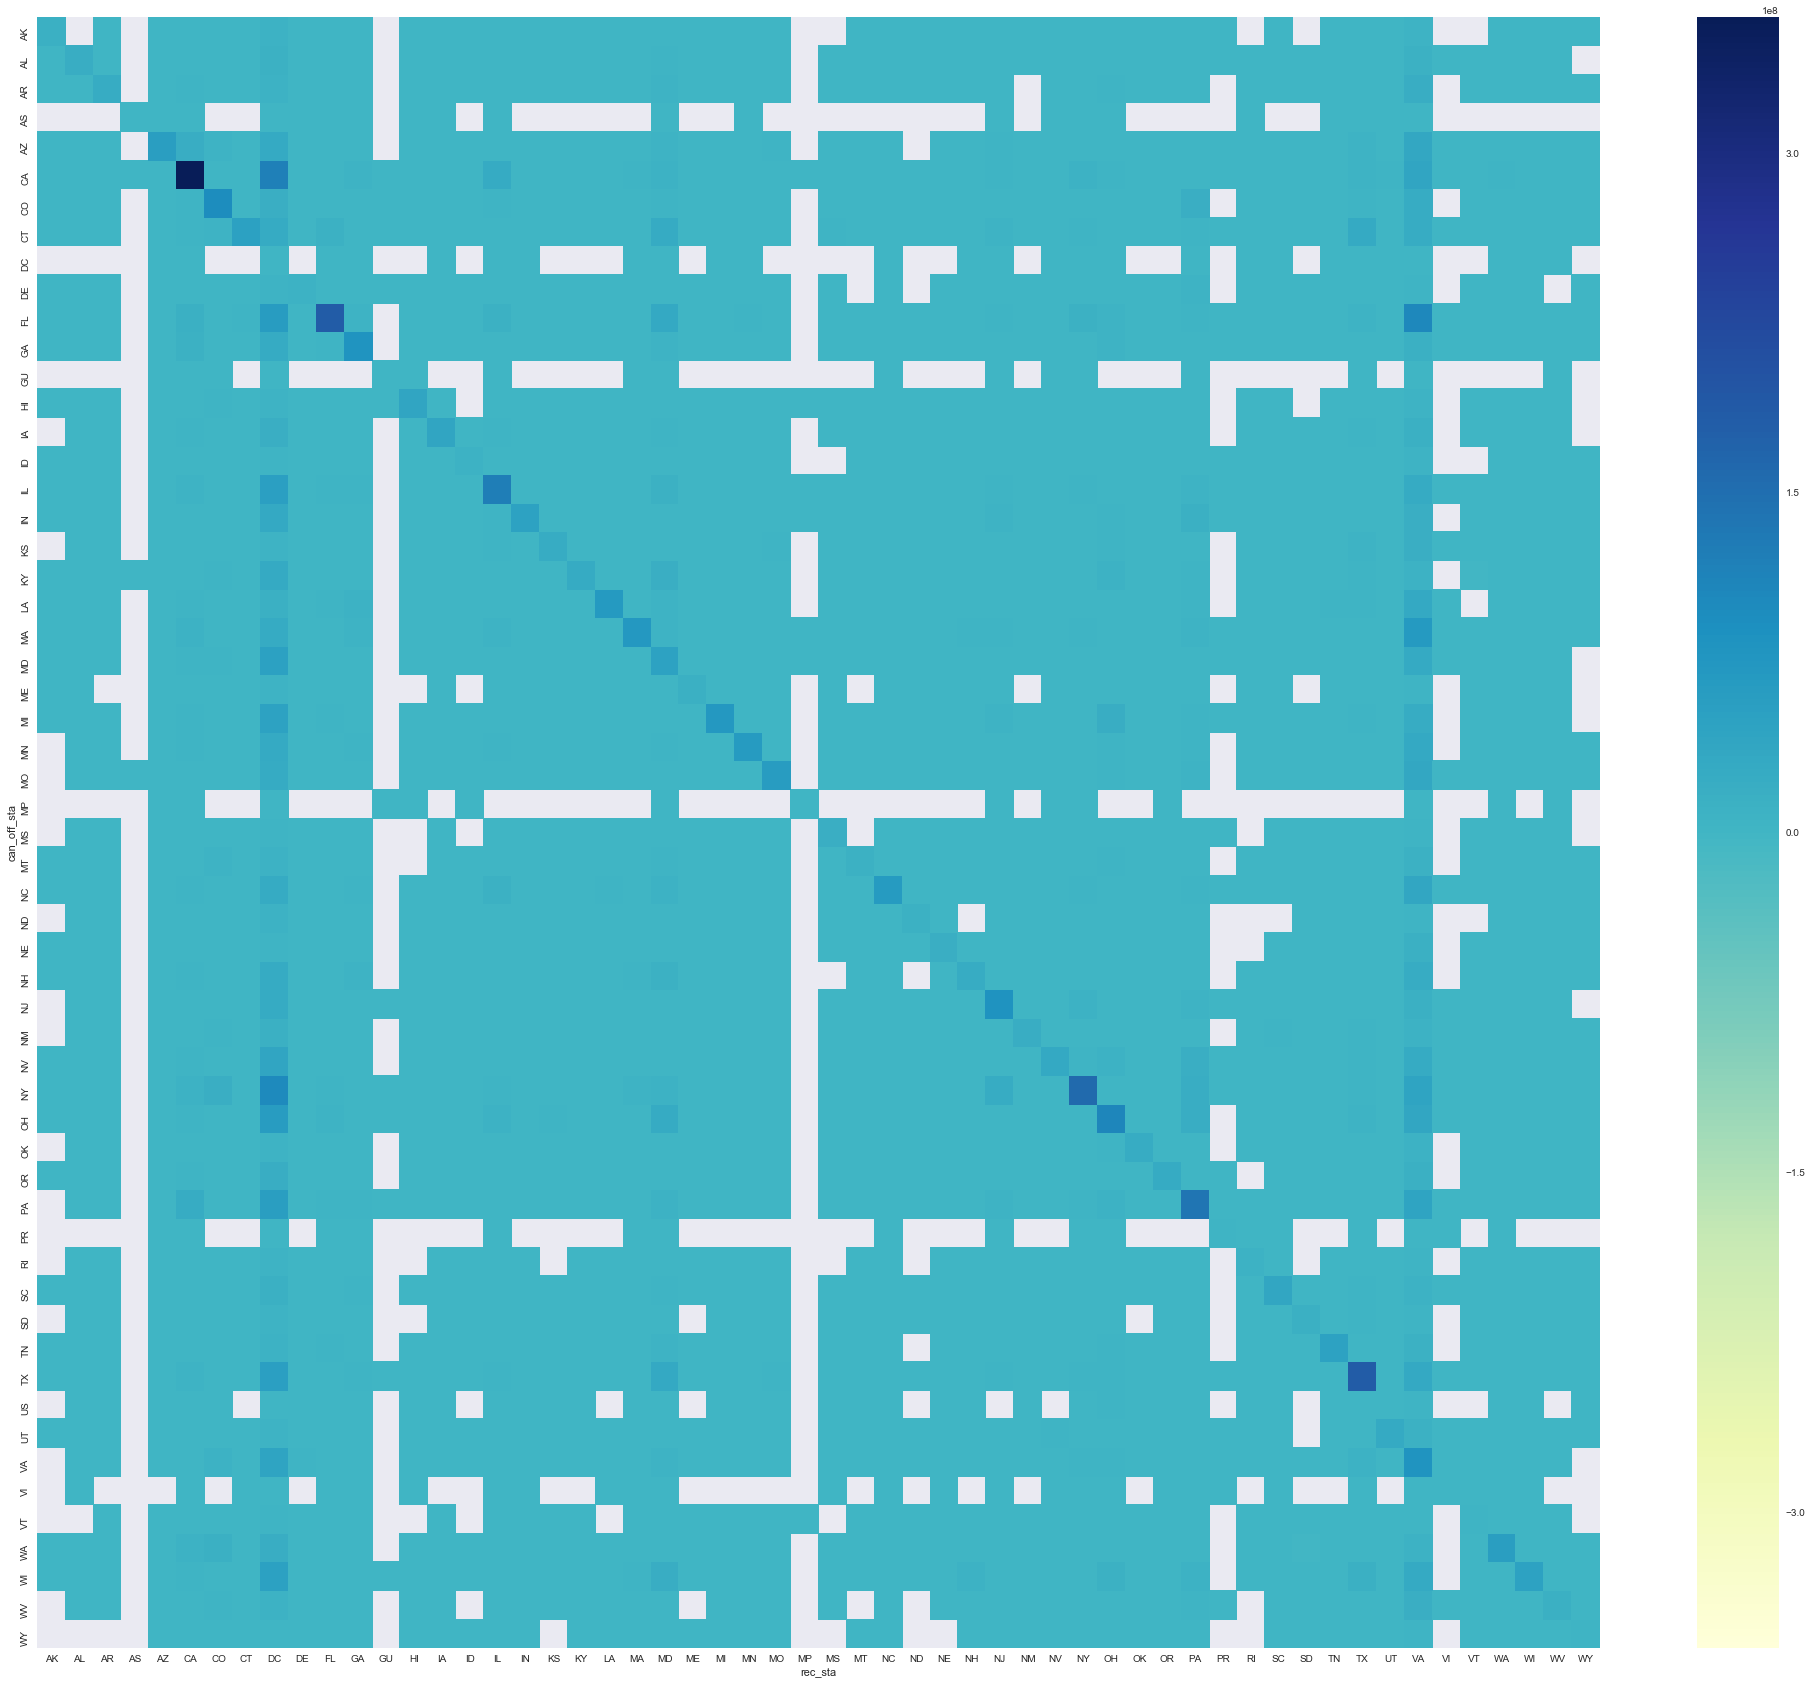

In [608]:
#Heatmap to plot what share of a candidates disbursements go to different recipient states
plt.rcParams['figure.figsize']=(35,30)
sns.heatmap(pv_db_df_b,cmap='YlGnBu')

In [59]:
#Grouping by statewise disbursements for candidates and ordeing it (for all years)
g = db_df.groupby(['can_off_sta','can_nam'])['dis_amo'].sum().to_frame().reset_index().sort_values(['dis_amo','can_off_sta'],ascending=False)

In [79]:
#Picking the top 20 candidates
g20 = g['can_nam'].head(20)

In [78]:
#Pivoting to get the net disbursements of the top 20 candidates over the 4 election years
p10_db_df = db_df[db_df['can_nam'].isin(g['can_nam'].head(20))].pivot_table(values='dis_amo',index='can_nam',columns='ele_yea',aggfunc=np.sum,fill_value=0)

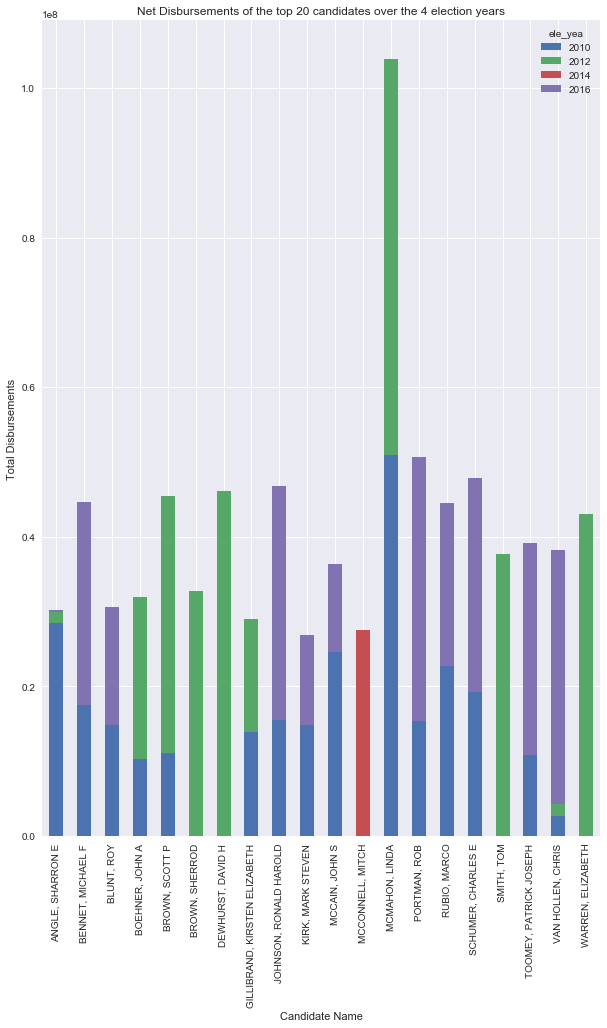

In [64]:
#Stacked barplot of the net disbursements of the top 20 candidates over the 4 election years
f9 = p10_db_df.plot.bar(figsize=(10,15),stacked='True')
f9.set_xlabel('Candidate Name')
f9.set_ylabel('Total Disbursements')
f9.set_title('Net Disbursements of the top 20 candidates over the 4 election years')